               X          Y  P_Factor  R_Factor  LS_Factor  C_Factor  \
0      74.293813  19.628599       1.0   803.498   0.000000      0.80   
1      74.313813  19.618599       0.8   804.611   2.389370      0.05   
2      74.273813  19.648599       0.8   804.832   0.000000      0.05   
3      74.313813  19.658599       1.0   805.158   0.000000      0.80   
4      74.333813  19.628599       1.0   805.229   2.643240      0.80   
...          ...        ...       ...       ...        ...       ...   
47262  73.643813  19.708599       1.0  2120.270   0.000000      0.80   
47263  73.643813  19.698599       1.0  2120.720   0.473251      0.80   
47264  73.643813  19.668599       1.0  2121.150   0.138861      0.80   
47265  73.633813  19.658599       0.8  2121.340   0.000000      0.05   
47266  73.643813  19.658599       1.0  2121.780   0.000000      0.80   

       K_Factor  Loss_Level  
0          0.18           1  
1          0.18           1  
2          0.18           1  
3          0.18

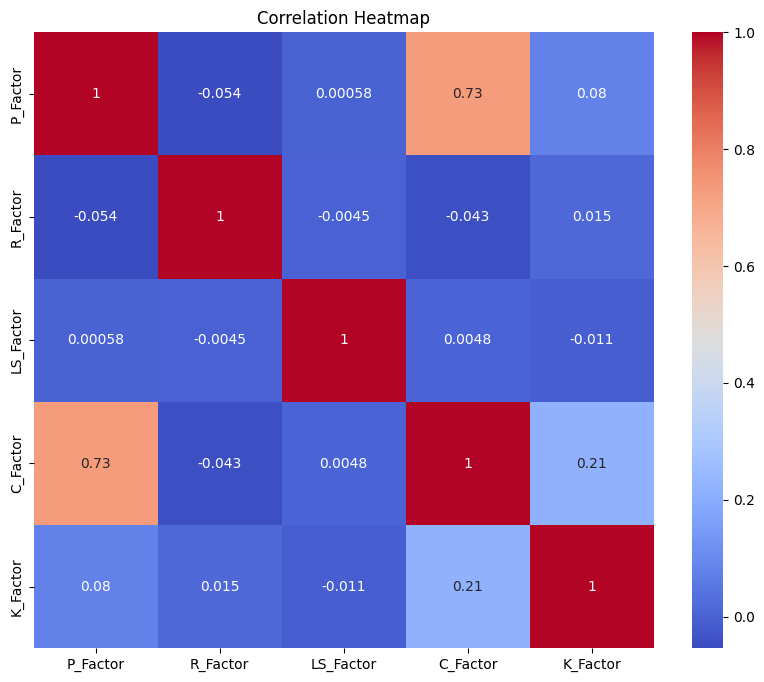

KNN Accuracy: 0.6584514491220648
              precision    recall  f1-score   support

           1       0.73      0.92      0.81      6384
           2       0.17      0.11      0.14      1255
           3       0.16      0.05      0.08       659
           4       0.13      0.02      0.03       371
           5       0.58      0.24      0.33       785

    accuracy                           0.66      9454
   macro avg       0.35      0.27      0.28      9454
weighted avg       0.58      0.66      0.60      9454

KNN Confusion Matrix:
[[5859  366   56   15   88]
 [1068  140   28    8   11]
 [ 484  114   34   11   16]
 [ 250   74   20    7   20]
 [ 401  116   70   13  185]]


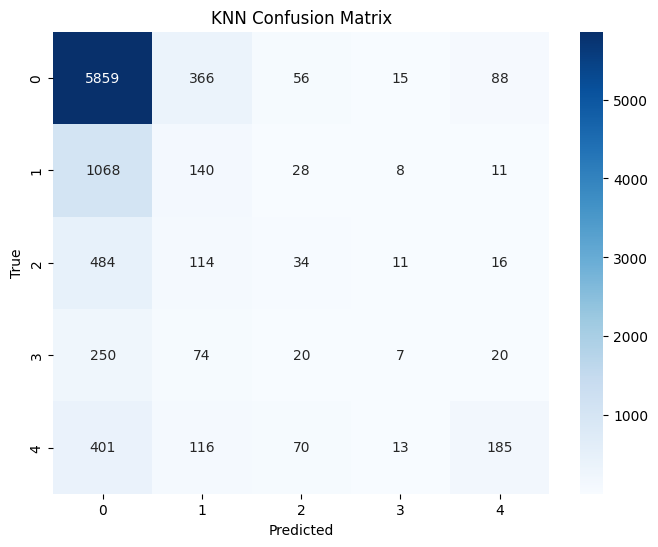

In [1]:
""" KNN """
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

"""Load the data from CSV"""
csv_path = "D:\soil errosion\input_csv\Training_Data.csv"
data = pd.read_csv(csv_path)
print(data)

"""Extract features"""
features = data[['P_Factor', 'R_Factor', 'LS_Factor', 'C_Factor', 'K_Factor']]
target = data['Loss_Level']

"""Apply Min-Max Scaling to the features"""
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

"""Convert scaled features back to a DataFrame"""
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

"""Display heatmap of correlation"""
correlation_matrix = scaled_features_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

"""Split the data into training and testing sets (80% for training, 20% for testing)"""
X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target, test_size=0.2, random_state=42)

"""Initialize the KNN Classifier with a specific number of neighbors (e.g., 3"""
k = 3
clf_knn = KNeighborsClassifier(n_neighbors=k)

"""Train the KNN model on the training data"""
clf_knn.fit(X_train, y_train)

"""Make predictions using the KNN model"""
y_pred_knn = clf_knn.predict(X_test)

"""Calculate and display accuracy, confusion matrix, and classification report for KNN"""
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)
confusion_mat_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)
print(class_report_knn)
print("KNN Confusion Matrix:")
print(confusion_mat_knn)

"""Plot the KNN confusion matrix graphically"""
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_knn, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("KNN Confusion Matrix")
plt.show()

In [2]:
"""now we have predicted directly on all the features of the csv file"""
heatmap_pred_KNN = clf_knn.predict(scaled_features_df)
heatmap_pred_KNN

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [5]:
"""importing folium for getting basemap to plot the classification"""
import folium
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster

"""Creating a function to call basemap whenever we need"""
def generate_basemap():
  basemap = folium.Map(location=[20.5937, 78.9629], zoom_start=4)
  return basemap

basemap = generate_basemap()

"""combining the the coordinates with the prediction done on the csv file"""
df_KNN = pd.DataFrame()
df_KNN['X'] = data['X']
df_KNN['Y'] = data['Y']
df_KNN['Loss_Level_predicted'] = heatmap_pred_KNN

heatmap = HeatMap(
    data=df_KNN[['Y', 'X', 'Loss_Level_predicted']],
    radius=20,
    gradient={0.2: 'blue', 0.6: 'green', 0.6: 'yellow', 1: 'red'},
    use_local_extrema=False  
)

"""Adding the heatmap to the basemap and displaying the Heatmap."""
heatmap.add_to(basemap)
basemap

In [7]:
"""importing folium for getting basemap to plot the classification"""
import folium
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster

"""Creating a function to call basemap whenever we need"""
def generate_basemap():
  basemap = folium.Map(location=[20.5937, 78.9629], zoom_start=4)
  return basemap

basemap = generate_basemap()

"""combining the the coordinates with the prediction done on the csv file"""
df_KNN = pd.DataFrame()
df_KNN['X'] = data['X']
df_KNN['Y'] = data['Y']
df_KNN['Loss_Level_predicted'] = heatmap_pred_KNN

heatmap = HeatMap(
    data=df_KNN[['Y', 'X', 'Loss_Level_predicted']],
    radius=15,  # Adjust this value to control density (smaller: denser)
    gradient={0.2: 'blue', 0.6: 'green', 0.6: 'yellow', 1: 'red'},
    use_local_extrema=False  
)

"""Adding the heatmap to the basemap and displaying the Heatmap."""
heatmap.add_to(basemap)
basemap